In [2]:
setwd('../data/TP_DATA_PROG/')

# I. Study of a monogenic disease: Clouston's disease

## a: Genetic linkage analysis - lodscore method

### a.1. Install the paramlink package and call the library

In [3]:
install.packages('paramlink')
library(paramlink)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


PLEASE NOTE:
Paramlink has been superseded by the `ped suite` packages (https://magnusdv.github.io/pedsuite/).
It is maintained for legacy purposes only, and should not be used in new projects.




### a.2. Read and view the data file

In [ ]:
cols<-c('Family_number','Individual_number','Father_number','Mother_number', 'Sex', 'Disease_status','marker1_1','marker1_2','marker2_1','marker2_2','marker3_1','marker3_2','marker4_1','marker4_2','marker5_1','marker5_2','marker6_1','marker6_2','marker7_1','marker7_2','marker8_1','marker8_2','marker9_1','marker9_2','marker10_1','marker10_2','marker11_1','marker11_2','marker12_1','marker12_2','marker13_1','marker13_2')

fam<-read.table('I.a.Paramlink/fam.txt')
colnames(fam)<-cols
fam[1:5,1:10]

,Family_number,Individual_number,Father_number,Mother_number,Sex,Disease_status,marker1_1,marker1_2,marker2_1,marker2_2
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,0,0,1,2,0,0,0,0
2,1,2,0,0,2,1,0,0,0,0
3,1,21,0,0,2,1,0,0,0,0
4,1,5,1,2,1,2,9,1,5,10
5,1,4,1,2,1,1,0,0,0,0


#### Q1:

genotype of the first marker of the individual of id 5

In [ ]:
for (row in 1:nrow(fam)){
  if (fam[row,'Individual_number']==5){
    cat(fam[row,]$marker1_1,fam[row,]$marker1_2)
  }
}

9 1

The genotype of the individual 5 is 9/1

### a.3. Data transformation for linkage analysis and descriptive statistics

In [ ]:
x=linkdat(fam)

Family ID: 1.
47 individuals.
22 affected, 25 non-affected.
10 nuclear subfamilies.
13 markers.



#### Q2:


In [7]:
## count the number of families in family number of fam
fam$Family_number

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1

There is 1 family in the dataset

In [ ]:
affected_indiv<-c()
unaffected_indiv<-c()

for (i in 1:nrow(fam)){
  if (fam[i,'Disease_status']==1){
    affected_indiv<-c(affected_indiv,fam[i,'Individual_number'])
  } else {
    unaffected_indiv<-c(unaffected_indiv,fam[i,'Individual_number'])
  }
}

paste0('affected indiv:',length(affected_indiv))
paste0('unaffected indiv:',length(unaffected_indiv))

[1] "affected indiv:25"

[1] "unaffected indiv:22"

There is: 

* 25 affected  
* 22 unaffected

13 markers are analyzed

<!-- 
1 family with 10 nuclear subfamilies.  
47 individuals: 22 affected, 25 non-affected.  
13 markers analyzed -->

#### Q3:

In [ ]:
x

   ID FID MID SEX AFF  V1   V2  V3  V4  V5
1   1   0   0   1   2 -/-  -/- -/- -/- -/-
2   2   0   0   2   1 -/-  -/- -/- -/- -/-
3  21   0   0   2   1 -/-  -/- -/- -/- -/-
4   5   1   2   1   2 9/1 5/10 4/2 2/3 3/2
5   4   1   2   1   1 -/-  -/- -/- -/- -/-
6   3   1   2   1   2 -/-  -/- -/- -/- -/-
7   6   0   0   2   1 -/-  -/- -/- -/- -/-
8  36   0   0   2   1 3/9  6/8 4/4 6/5 1/2
9  26   5  21   1   2 9/2  5/6 4/2 2/3 3/2
10 25   5  21   2   1 1/2 10/6 2/2 3/3 2/2
11 23   5  21   2   2 9/2  5/5 4/4 2/4 3/3
12 30   0   0   1   1 -/-  -/- -/- -/- -/-
13 22   5  21   2   2 9/2  5/5 4/4 2/4 3/3
14 27   0   0   1   1 1/1  2/9 3/4 3/4 3/3
15 24   5  21   2   2 9/2  5/6 4/2 2/3 3/2
16 32   0   0   1   1 2/2  9/3 4/4 2/5 3/4
17 44  26  36   2   2 9/3  5/6 4/4 2/6 3/1
18 43  26  36   2   2 9/9  5/8 4/4 2/5 3/2
19 42  26  36   2   1 -/-  -/- -/- -/- -/-
20 41  26  36   1   2 9/9  5/8 4/4 2/5 3/2
21 40  26  36   2   1 3/2  6/6 4/2 6/3 1/2
22 39  26  36   1   1 3/2  6/6 4/2 6/3 1/2
23 38  26  

They have taken each 2 markers and transformed them into one column of format `allele1/allele2` $\iff$ representing the genotype

#### Q4

In [ ]:
summary(x)

Pedigree:
---------
47 individuals
11 founders, 36 nonfounders; bit size = 61 
10 nuclear subfamilies 
22 affected by disease, 25 unaffected, 0 with unknown affection status

Marker data:
------------
13 markers in total
13 individuals with no available genotypes: 1, 2, 21, 4, 3, 6, 30, 42, 8, 10, 11, 17, 47 
0 % missing alleles (excluding ungenotyped individuals)

Chromosome distribution of markers:
 chromosome unknown: 13 markers

Allele number distribution:
 3 alleles: 1 marker
 4 alleles: 4 markers
 5 alleles: 2 markers
 6 alleles: 2 markers
 7 alleles: 4 markers

Model parameters:
-----------------
No model parameters set


There is: 

* 11 founder individuals  
* 13 with unknown genotypes  
* 4 markers with 7 alleles

### a.4. Family tree drawing for 1st marker

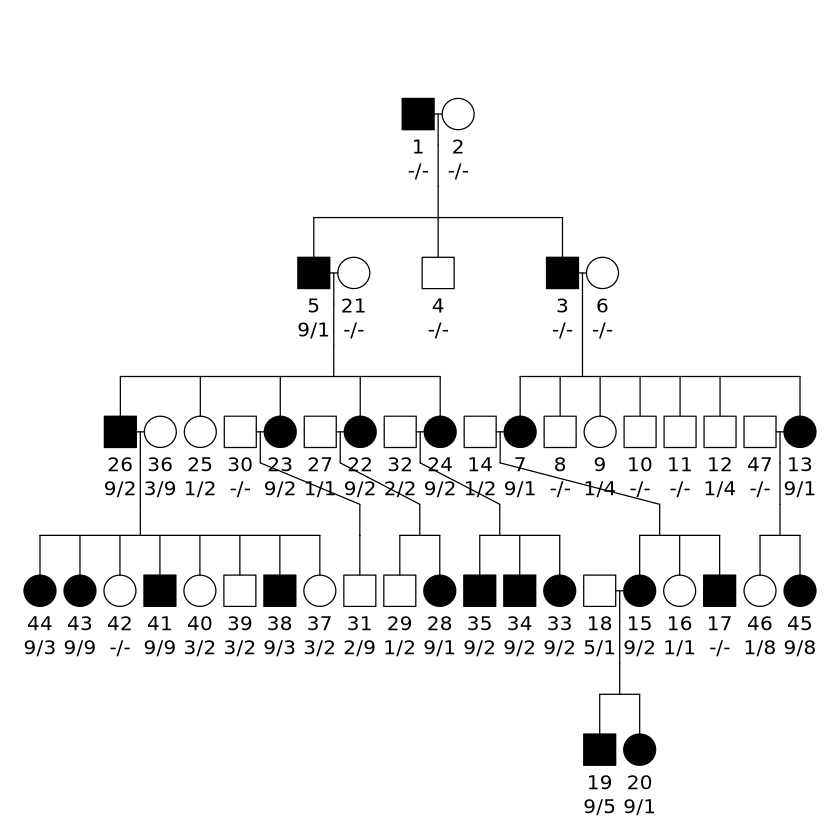

In [ ]:
plot(x, marker=1)

#### Q5:

For indiv 15,16 and 17 repsectively:  

* 9/2  
* 1/1
* missing (-/-)

### a.5. Definition of the genetic model to be considered for linkage analyses

Here `Dd` and `DD` are the at-risk genotypes, since it's autosomal dominant and `d` is the deleterious allele (so dominant allele)

In [12]:
xdom=setModel(x, model=1, penetrances = c(0.00001,1,1), dfreq=0.00001)

Here we have $Phenocopy=P(affected/DD) = 0.00001$  

### a.6. Linkage analyses with lodscore calculation for given theta values

In [13]:
lod_values=lod(xdom, theta=c(0,0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5))

In [ ]:
lod_values

                   M1        M2        M3        M4         M5        M6
theta=0:     7.673800  7.247411  4.762693  8.171219  6.0050443  4.969872
theta=0.05:  7.035453  6.653626  4.309984  7.511664  5.4606032  4.555357
theta=0.1:   6.365581  6.030791  3.848484  6.819437  4.8898188  4.121439
theta=0.15:  5.661047  5.376151  3.371107  6.091242  4.2903721  3.666446
theta=0.2:   4.918254  4.686580  2.871736  5.323255  3.6599709  3.188760
theta=0.25:  4.133297  3.958642  2.346428  4.511135  2.9968532  2.687328
theta=0.3:   3.302875  3.189035  1.795610  3.650405  2.3012371  2.162844
theta=0.4:   1.528959  1.530367  0.682811  1.782355  0.8643605  1.069246
theta=0.5:   0.000000  0.000000  0.000000  0.000000  0.0000000  0.000000
                    M7         M8         M9        M10        M11       M12
theta=0:     5.7141323  5.2550744  4.2537353  3.5643218  0.2874061  1.061945
theta=0.05:  5.1742276  4.7499732  3.8555848  3.2523734  3.5708778  4.285454
theta=0.1:   4.6083512  4.2271963  3.44

#### Q6

We can the same pattern for markers M1 to M10: max lod score is obtained for theta=0 and its value in each of these markers is higher than 3 -> reject the null hypothesis -> conclusion is this gene is very close to each of these genetic markers. And if the disease gene is close to them all it means that the first 10 markers are in cluster, they are very close. 

For marker 11 and 12 the max lod score is obtained for same theta value = 0.05 and the value is higher than 3 so we can reject the null hypothesis and conclude that the probable location of the disease locus is around 0.05 cM from these markers. 

For the marker 13, there is no theta value for which the lod-score is higher than 3, but for theta=0 the lod-sore = -32 < -2 so the null hypothesis is not rejected, hence we can exclude that the disease gene is close to this marker. 

#### Q7

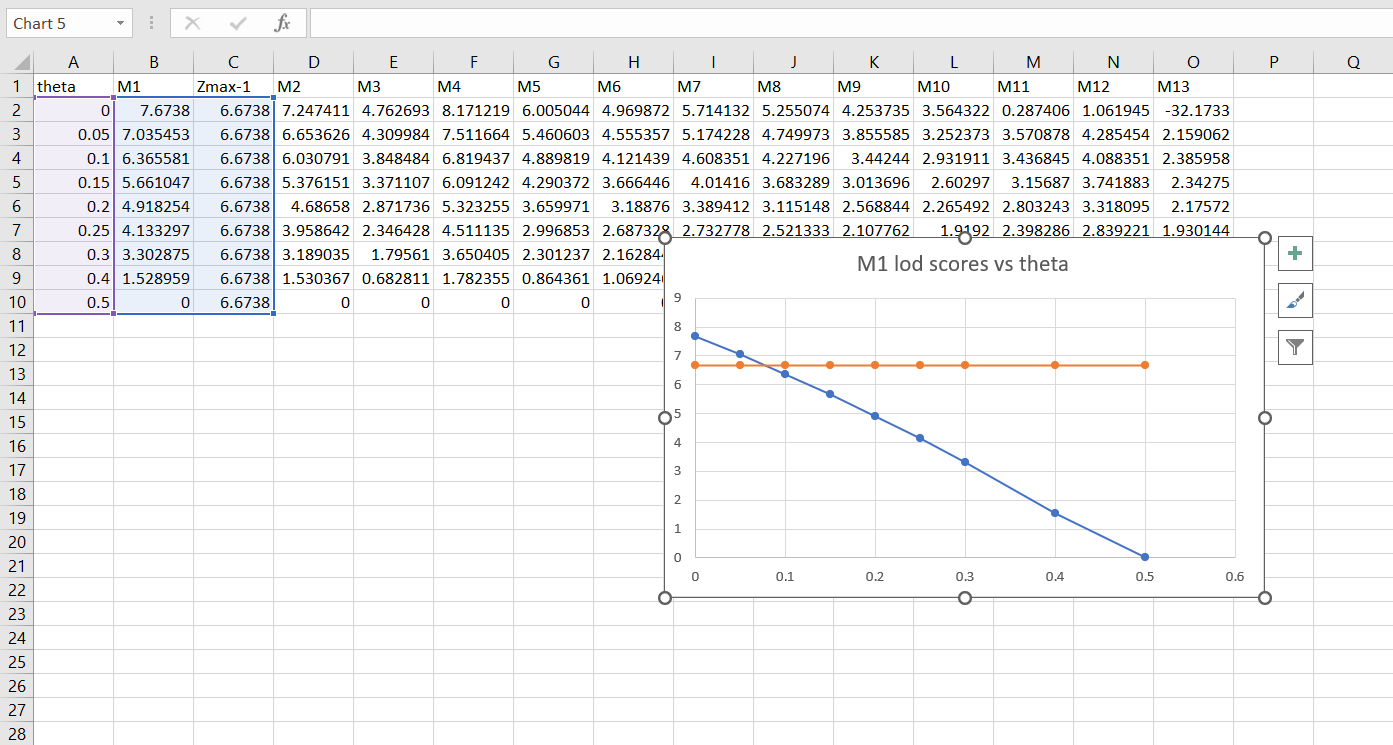

The recombination rate is between 0 and 0.5 so the confidence interval for the recombination rate will be in this range. Here theta max is 0 because it is for theta = 0 that we have the maximum of the lod score. It means that the lower bound of the confidence interval will be equal to 0 and the intersection is the upper bound. We approximate it. 

Confidence interval for Marker 1 is ranging between $[0, 0.07]$ 

### a.7.  Linkage analyses with determination of maximum lodscore

In [27]:
lod(xdom, marker=c(5,7,8,12), theta='max')

              M5        M7        M8         M12
LOD:    6.005044  5.714132  5.255074  4.28823977
t_max:  0.000000  0.000000  0.000000  0.04508497

#### Q8

Interpretation of the results:  

For markers $M_5$, $M_7$ and $M_8$, $\theta_{max}$ is 0 which means that the markers is very close to the disease gene.  

For marker $M_{12}$, $\theta_{max}$ is 0.045 with a lod score of $0.045\gt3$, which is -

#### Q9

In [26]:
## as.matrix(lod_values)
for (i in 1:ncol(lod_values)){
    max_lod=max(lod_values[,i])
    cat('max lod value for marker',i,'is',max_lod,'\n')
}

max lod value for marker 1 is 7.6738 
max lod value for marker 2 is 7.247411 
max lod value for marker 3 is 4.762693 
max lod value for marker 4 is 8.171219 
max lod value for marker 5 is 6.005044 
max lod value for marker 6 is 4.969872 
max lod value for marker 7 is 5.714132 
max lod value for marker 8 is 5.255074 
max lod value for marker 9 is 4.253735 
max lod value for marker 10 is 3.564322 
max lod value for marker 11 is 3.570878 
max lod value for marker 12 is 4.285454 
max lod value for marker 13 is 2.385958 


#### Q10

Markers 1-10 all have the same pattern of lod scores relative to $\theta$ values: The highest lod score is at $\theta_0$ and the lowest at $\theta_{0.5} (=0)$, with lod scores $\gt3$, which means that the markers are at very close proximity to the disease gene.

### a.8. Linkage analyses by modifying marker allele frequencies

In [43]:
## -- before when they were equifrequent
as.data.frame(lod_values[,"M5"])

,"lod_values[, ""M5""]"
,<dbl>
0,6.0050443
0.05,5.4606032
0.1,4.8898188
0.15,4.2903721
0.2,3.6599709
0.25,2.9968532
0.3,2.3012371
0.4,0.8643605
0.5,0.0000000


In [30]:
## -- after modifying allele frequencies
xdom5=modifyMarker(xdom,marker = 5, afreq = c(0.1, 0.1, 0.1, 0.7))
lod(xdom5, marker=5, theta=c(0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5))

                    M5
theta=0:     6.1601384
theta=0.05:  5.6089781
theta=0.1:   5.0311016
theta=0.15:  4.4242603
theta=0.2:   3.7862270
theta=0.25:  3.1152044
theta=0.3:   2.4110015
theta=0.4:   0.9454197
theta=0.5:   0.0000000

#### Q11

Results have been modified slightly in each, overall the same pattern (decreasing when increasing theta values) with only a small increase of lod values of when we changed the frequencies, and then reaching 0 when $\theta=0.5$ 

why? --

### a.9.  Impact of misspecifying the genetic model

In [ ]:
xrec=setModel(x, model=2, penetrances=c(0.00001,0.00001, 1), dfreq=0.00001)
lod(xrec)

                 M1         M2         M3         M4         M5         M6
theta=0:  -11.52737  -20.34523  0.8394887  -20.80169  -11.46918  -16.24291
                 M7         M8        M9        M10        M11        M12
theta=0:  -6.483199  -3.089972  1.408298  -14.51178  -16.13149  -8.403986
                M13
theta=0:  -3.274896

#### Q12

Markers $M_1, M_2, M_4, M_5, M_6, M_7, M_8, M_{10}, M_{11}, M_{12}, M_{13}$  have a negative value $\lt-2$ for $\theta_{max}$, which means that the markers are far from the disease gene.

Except for $M_3$ and $M_9$ which have a positive value however ranging between $-2\lt lodscore\lt3$ hence nothing can be concluded

In this section we have changed the mode of inheritance from autosomal dominant to autosomal recessive, we can clearly see the differences in the results as in here we haven't concluded any marker that is in close proximity to the desiease gene, this is because the mode of inheritance changes the at risk genotypes which in return affect the calculation of the lod score

This is the imortance of the disease model's influence, it's crucial to be near the true model.

_The lod score is parametric because it's affected by genetic mode of the diseaese and the alellic frequencies_

## b: Familial association analysis - TDT

```bash
!./fbat.exe
```


```text
*******************************************************
*                                                     *
*     *********  * * *          *       *********     *
*     *          *     *       * *          *         *
*     *******    *  * *       *   *         *         *
*     *          *     *     * *** *        *         *
*     *          *     *    *       *       *         *
*     *          * * *     *         *      *         *
*                                                     *
*          Xin Xu  C1999-2009       v2.0.4(beta1)      *
*          Program for Population Genetics            *
*          Harvard School of Public Health            *
*                                                     *
*******************************************************
```

```text
>> log resfbat
logging to file "resfbat" is on
>> load fbat.ped
read in: 6 markers from 651 pedigrees (652 nuclear families,2011 persons)
```


#### Q13

There are:  

* 652 nuclear families
* 2011 persons i.e. $\frac{2011}{652} \approx 3$ individuals per family  
* 6 markers

```text
>> fbat
trait affection; offset 0.000; model additive; test bi-allelic; minsize 10; min_freq 0.000; p 1.000; maxcmh 1000

Marker  Allele   afreq   fam#     S-E(S)      Var(S)       Z           P
------------------------------------------------------------------------
SNP2    1        0.636    409      3.500     138.750   0.297    0.766365
SNP2    2        0.364    409     -3.500     138.750  -0.297    0.766365
SNP3    1        0.370    402      2.000     140.500   0.169    0.866009
SNP3    2        0.630    402     -2.000     140.500  -0.169    0.866009
SNP4    1        0.403    425      5.000     148.500   0.410    0.681582
SNP4    2        0.597    425     -5.000     148.500  -0.410    0.681582
SNP5    1        0.626    393     -4.500     136.750  -0.385    0.700377
SNP5    2        0.374    393      4.500     136.750   0.385    0.700377
SNP6    1        0.212    283    -52.000      91.000  -5.451   5.01e-008
SNP6    2        0.788    283     52.000      91.000   5.451   5.01e-008
```

#### Q14

An informative family is a family where there exists at least one parent that is heterozygous (make sure)

All SNPs are present in the results, i.e., they have at least 10 informative families (lowest one is 283), hence no, there are no markers for which the number of informative families is insufficient

#### Q15

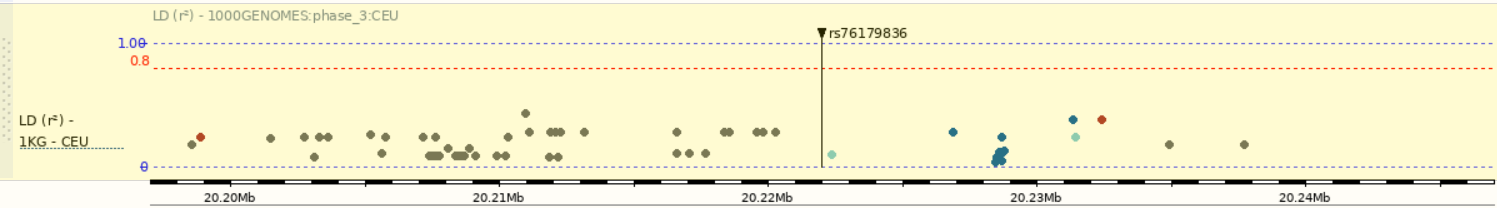

#### Q16

According to the results coming from `fbat`, SNP6 is in association with the disease, it's actually the only one in the table with a p-value less tahn 0.05, thus there is a significant association. It's either that SNP6 is the disease gene or is in linkage disequilibrium with the disease gene.  
Allele 2 is the at-risk allele that is more transmited from a heterozygous parent to a diseasee child, since the $S-E(S)\gt0$ 

From Ensembl plot, $r^2$ is below threshold for all nearby markers, meaning that none of the markers are in linkage disequilibrium with the SNP of interest (SNP6) `rs76179836`, so we can conclude that it is the causal variant

# II. Study of a multifactorial disease: rheumatoid arthritis

## a. Genetic linkage analysis–affected sib-pairs method

## b. Genome-wide association analysis

### b.1. A few quality controlsteps

#### Q19